# Declaration of Originality

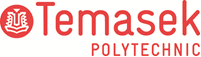

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jafar Niaz (2402057J)
* Tutorial Group                :  TC02
* Tutor						    :  Ester Goh
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd 
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 1. Business Understanding
- 1. Problem Context:
Singapore's used car market is highly complex as vehicle prices are not only affected by car attibrutes but also policy, such as the Certificate of Entitlement (COE). For consumers, this creates a pain point, where they are unable to get their exact car price at any given moment, as they have to manually compare with research, find agents, or estimate based on other people's sales. This goes for both buyers & sellers, who at any point, will have to go through all this hassle to get an estimate of their car's price, whether it's a buyer looking for the ideal car or a seller making a sale on their own car. This project builds a Singapore Used Car Price Predictor to estimate resale price from key car attributes.

- 2. Business Goal
My goal for this "Startup" is to build a Machine Learning powered web application, that can give a fast & reasonable estimated price for a used car, so that users can make better decisions for buying/selling.

- 3. Task Definition
Since we are predicting the price of a car, our target value (y), is the Price , and since predicting price is a countinous data problem, we will need to use Regression to build our model and give an output of estimated resale price.

- 4. Stakeholders
The primary users of this app will be Individual car buyers and sellers, however, secondary users / possible business oppurtunities , are small used-car dealers (often found on platforms such as carousell), who can make use of the model service. Car markets like SGCarmart too.

- 5. Business Success Criteria
The prediction error of the model should be low enough to support financial decisions for users, eg. lower MAE (directly seen in SGD). As well as a simple enough web app, with not too many fields, just basic info of the car, eg. yearly road tax, to make it simple & available to users.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
FILE_PATH = "SG_usedcar.csv"
df = pd.read_csv(FILE_PATH)
## load dataset from csv path

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

## Check for missing data
df.isna().sum()

## Describe data distribution
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            4411 non-null   object 
 5   Mileage        4411 non-null   object 
 6   Road Tax       4411 non-null   object 
 7   Dereg Value    4411 non-null   object 
 8   COE            4411 non-null   object 
 9   Engine Cap     4411 non-null   object 
 10  Curb Weight    4411 non-null   object 
 11  Manufactured   4411 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            4411 non-null   object 
 14  ARF            4411 non-null   object 
 15  Power          4411 non-null   object 
 16  No. of Owners  4411 non-null   object 
 17  Price          4411 non-null   object 
 18  Unnamed:

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
count,4411,4411,4411,4389,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,4411,1.500000e+01
unique,2159,11,2347,1878,1489,1318,311,3047,1091,203,449,34,18,3116,3380,473,7,1105,NaN
top,Honda Vezel 1.5A X,Luxury Sedan,N.A.,10yrs COE left),N.A,N.A,N.A,N.A,N.A,1998,1800,2016,Auto,N.A,5000,90,1,N.A,NaN
freq,58,885,20,169,708,1560,428,965,259,308,91,570,4049,418,85,247,2058,735,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.140886e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.044258e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.059880e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.919000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.068000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.698880e+05


In [4]:
## quick profile data frame
print("Shape:", df.shape)
df.info()

display(df.head())


Shape: (4411, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            4411 non-null   object 
 5   Mileage        4411 non-null   object 
 6   Road Tax       4411 non-null   object 
 7   Dereg Value    4411 non-null   object 
 8   COE            4411 non-null   object 
 9   Engine Cap     4411 non-null   object 
 10  Curb Weight    4411 non-null   object 
 11  Manufactured   4411 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            4411 non-null   object 
 14  ARF            4411 non-null   object 
 15  Power          4411 non-null   object 
 16  No. of Owners  4411 non-null   object 
 17  Price          4411 non-null   obj

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


In [5]:
## 2.3 Missing values + basic stats
df_eda = df.copy() # set up EDA df so it doesn't affect value of df used elsewhere in case of edits during eda
df_eda = df_eda.replace(["N.A", "N.A.", "NA", "na", "-", ""], np.nan) # this dataset has many missing value indictors. this line helps standardise them to np.nan
## this allows pandas drop na functions to work appropiately with the dataset.

# Remove malformed scraped rows. for some reason in this dataset there are some rows with 19 columns instead of 18, which are likely malformed scraped rows. we can identify them by looking for non-null values in the "Unnamed: 18" column, which should be null for all valid rows.
if "Unnamed: 18" in df_eda.columns:
    malformed_rows = int(df_eda["Unnamed: 18"].notna().sum()) # check how many malformed rows there are
    df_eda = df_eda[df_eda["Unnamed: 18"].isna()].copy() # keep only rows where "Unnamed: 18" is null
    df_eda = df_eda.drop(columns=["Unnamed: 18"]) # drop the "Unnamed: 18" column as it is no longer needed
    print("Malformed rows removed:", malformed_rows) # print how many malformed rows were removed

# Missing summary (count + %)
missing_summary = pd.DataFrame({ # create a summary dataframe for missing values
    "missing_count": df_eda.isna().sum(),
    "missing_pct": (df_eda.isna().mean() * 100).round(2)
}).sort_values("missing_pct", ascending=False) # sort by missing percentage descending, so most missing columns are on top

display(missing_summary)

df_eda.describe(include="all").transpose() # get basic statistics for all columns, including categorical ones


Malformed rows removed: 15


,missing_count,missing_pct
Mileage,1556,35.40
Dereg Value,950,21.61
Dep,771,17.54
Price,720,16.38
Road Tax,428,9.74
OMV,418,9.51
COE,258,5.87
Curb Weight,66,1.50
No. of Owners,57,1.30
Coe_left,8,0.18


,count,unique,top,freq
Brand,4396,2145,Honda Vezel 1.5A X,58
Type,4396,11,Luxury Sedan,879
Reg_date,4390,2346,27-May-21,13
Coe_left,4388,1878,10yrs COE left),169
Dep,3625,1487,8160,12
Mileage,2840,1312,120000,34
Road Tax,3968,309,1210,354
Dereg Value,3446,3046,27989,22
COE,4138,1090,53001,36
Engine Cap,4393,201,1496,306


This cell acts like a "audit" for my dataset, essential for both EDA & modelling. It standardizes inconsistent missing-value tokens, removes malformed scraped rows using Unnamed: 18 as a quality flag, before it reports all the missing values per column. I also made sure to use ```df_eda.describe(include="all").transpose() ``` to give some statistics to understand distribution & unusual values at a quick glance. This helps overall to create a clean & transparent dataset baseline for EDA to come.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data (simple and meaningful)

This next block is my first set of EDA,which is designed to be focused on price prediction. First, it checks the y (Price), distribution & skewness, to better undersand when extreme outliers will affect modelling. It helps me visualises important numeric features distributions, and identify possible cleaning needs . Then, scatter plots against Price show the feature-target relationships for all features, and whether they're linear or non linear. to help decide which models to use (linear vs tree-based). Lastly, the box plot, helps find categorical differencess across the different vehicle types while also addressing the right skew.  Overall, this gives clear evidence on data shape, outliers, and predictive signal before model training.

Graph Analysis & EDA Interpretation:


1. Price Distribution (Histogram + skewness)
- The price histogram is strongly right-skewed. The skewness is 4.815, which means most used cars are concentrated in the lower to mid-price range, and a small number of exotic cars trade at high price tail up to $1 million SGD. This confirms that outliers are a real part of the market and not just data noise. For our modeling later on, it implies that we should prefer more robust methods like tree-based models and evaluate error in mean average error so that we can get the outcome in SGD, as a few extreme cars can disproportionately affect our average squared error metrics.

2. Numeric Feature Distributions (Mileage, Road Tax, Engine Cap, Curb Weight, Power, Vehicle_Age)
- Most numeric features are also right-skewed, with dense clusters in realistic consumer ranges and smaller tails at extreme values. For example, mileage and power have clear concentration bands, while engine capacity and curb weight show sparse extreme values that may represent uncommon vehicle classes or noisy records. Vehicle age appears more structured, with noticeable peaks likely reflecting common registration cohorts. Overall, the distributions support my strategy of selective feature use and cleaning before training, since raw ranges differ greatly and extreme values exist across multiple columns.

3. Scatter (feature vs target)
-Across all the scatter plots, the relationships are clearly non-linear and are affected by outliers, which means no single variable can explain the price of the car on its own. Mileage generally trends downwards with price, while power, engine cap, and road tax show positive price association. Curb weight is weaker and more dependent on the segment. The big spread at many x values indicate that there's strong interaction effects, so tree-based models are more suitable than just linear , and feature grouping is justified.

4. Price by Type (BoxPlot)
- The boxplot that goes by the type of vehicle shows strong segmentation effects. Sports car, SUV, and luxury sedan all show higher medians and wider upper ranges. Meanwhile, hatchback, midsize sedan, and van are more lower. MPV and truck sit in the middle, with notable spread, indicating many mixed use cases and condition levels. This graph directly justifies my feature engineering choice later on to group vehicles into broader market segments, such as premium passenger versus mainstream versus commercial vehicles, which reduces curse of dimensionality while preserving meaningful business signal of the data.

Price skewness: 4.815


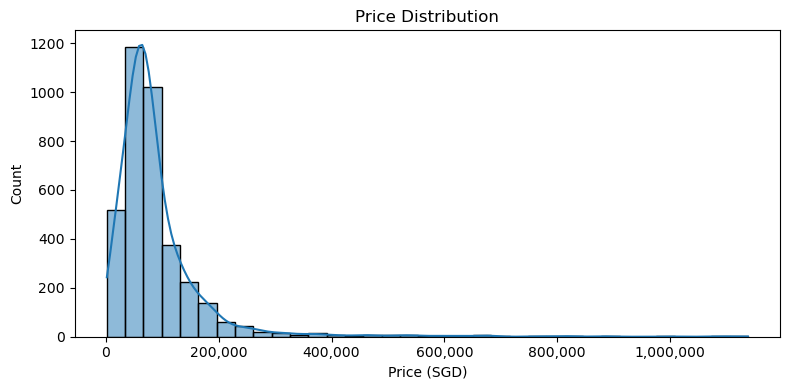

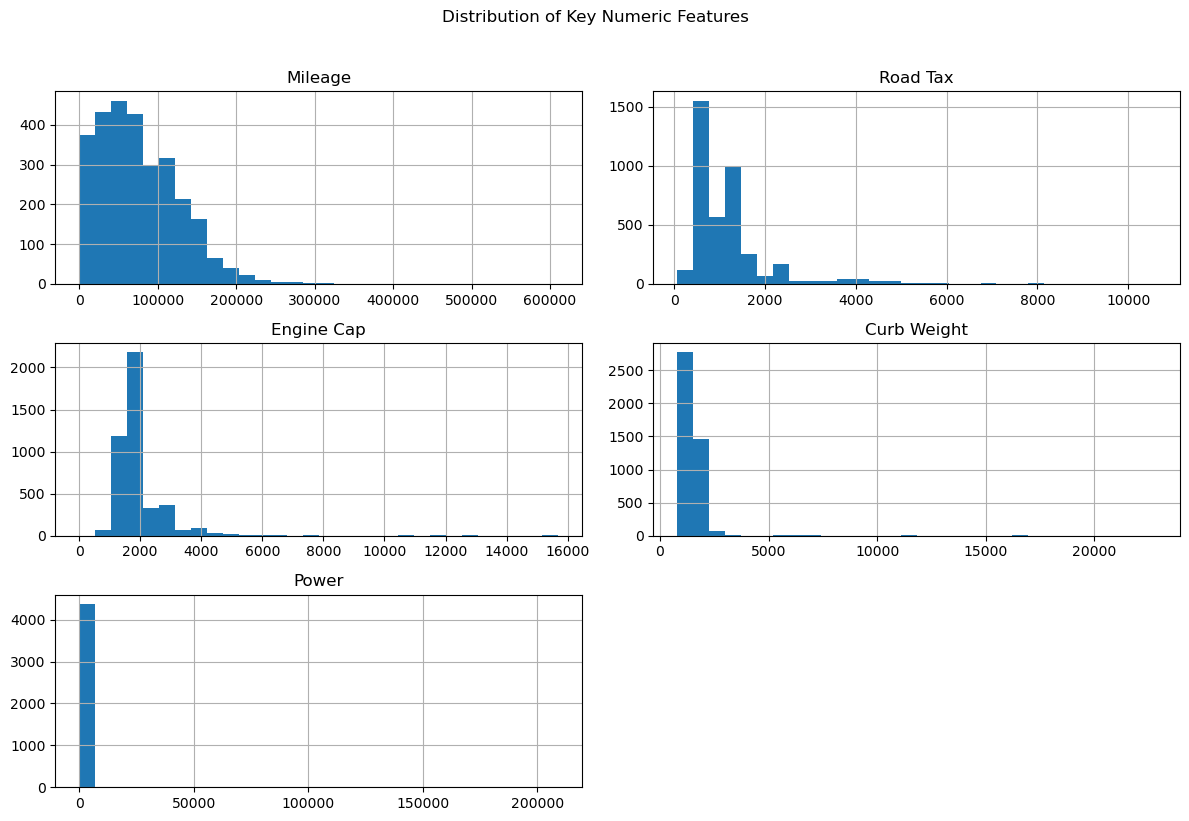

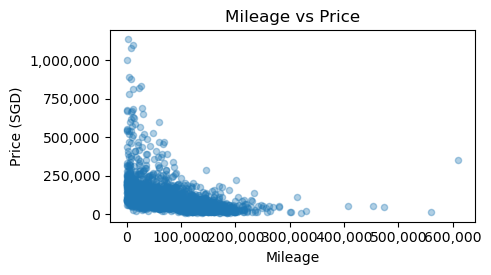

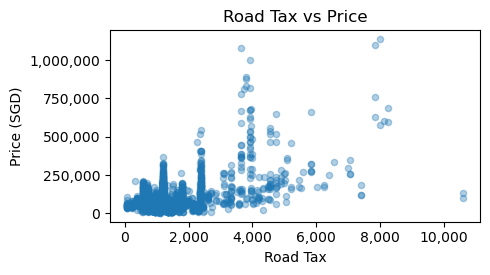

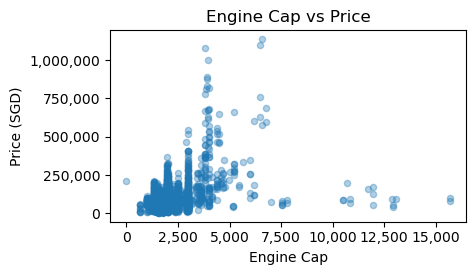

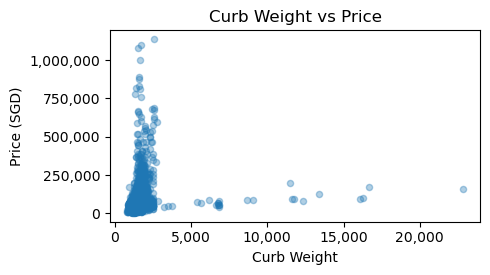

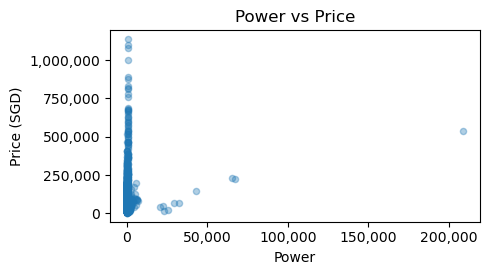

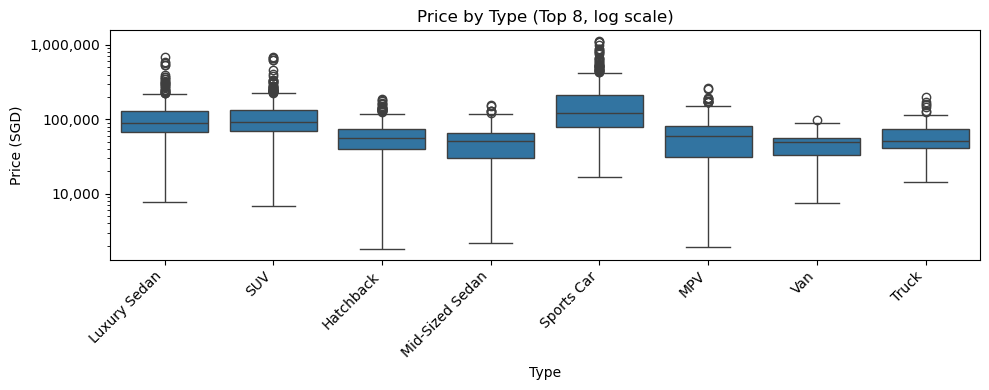

In [6]:
from matplotlib.ticker import FuncFormatter

## 2.3.1 Understanding distribution of data (simple and meaningful)

# Helper formatter: 120000 -> 120,000
fmt_int = FuncFormatter(lambda x, pos: f"{x:,.0f}")

# 1) Target distribution
col_y = "Price"
df_eda[col_y] = pd.to_numeric(df_eda[col_y], errors="coerce")
target = df_eda[col_y].dropna()

print("Price skewness:", round(target.skew(), 3))

plt.figure(figsize=(8, 4))
ax = sns.histplot(target, bins=35, kde=True)
ax.xaxis.set_major_formatter(fmt_int)
plt.title("Price Distribution")
plt.xlabel("Price (SGD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2) Numeric feature distributions
num_cols = ["Mileage", "Road Tax", "Engine Cap", "Curb Weight", "Power", "Vehicle_Age"]
num_cols = [c for c in num_cols if c in df_eda.columns]

for c in num_cols:
    df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce")

axes = df_eda[num_cols].hist(figsize=(12, 8), bins=30)
for ax in axes.flatten():
    # format only Price-like axes if they appear
    if ax.get_xlabel() in ["Road Tax", "Mileage", "Engine Cap", "Curb Weight", "Power"]:
        ax.xaxis.set_major_formatter(fmt_int)

plt.suptitle("Distribution of Key Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

# 3) Relationship with target
for col_x in num_cols:
    ax = df_eda.plot(x=col_x, y=col_y, kind="scatter", alpha=0.35, figsize=(5, 3))
    ax.yaxis.set_major_formatter(fmt_int)   # Price axis
    # If x is large numeric, format x too
    if col_x in ["Mileage", "Road Tax", "Engine Cap", "Curb Weight", "Power"]:
        ax.xaxis.set_major_formatter(fmt_int)

    plt.title(f"{col_x} vs {col_y}")
    plt.suptitle("")
    plt.xlabel(col_x)
    plt.ylabel("Price (SGD)")
    plt.tight_layout()
    plt.show()

# 4) Categorical distribution impact
if "Type" in df_eda.columns:
    top_types = df_eda["Type"].value_counts().head(8).index
    plt.figure(figsize=(10, 4))
    ax = sns.boxplot(data=df_eda[df_eda["Type"].isin(top_types)], x="Type", y="Price")
    plt.yscale("log")
    ax.yaxis.set_major_formatter(fmt_int)   # still show numeric labels on log axis
    plt.title("Price by Type (Top 8, log scale)")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Price (SGD)")
    plt.tight_layout()
    plt.show()


### 2.3.1.1 Understanding distribution of target (Price)

The Y, which is the target variable price, is positively skewed, which means that most of the cars are concentrated from the lower to the mid-price range, with a very small number of high-priced vehicles that create a long right tail. To make the pattern easier to interpret, the histogram is zoomed in to the 99th percentile, which allows that the bulk of listings can be seen clearly without being dominated by extreme outliers. The box plot confirms this pattern by showing many high-end outliers towards the upper end of the whisker, which is expected in Singapore's used car market due to the luxury segments. This distribution shows that modeling should be robust to our outliers and evaluated with error metrics that remain interpretable in dollars, such as mean average error, while also considering tree-based models that can handle non-linear, skewed target behavior like in our dataset.

EDA Analysis:

1. Price Distribution Histogram + Skew
- The same as before, the histogram shows the right skewness of the price, with most cars in the lower 2-bit range, and a long tail extending to higher prices. This variance is consistent with our previous EDA, and hence I will not go into further detail, as I've explained previously how the MAE-based interpretation is more important for this, and I'll also go into deeper detail on the previous EDA analysis regarding the price distribution.

2. Price Boxplot
- The box plot confirms the same pattern as above, a compact interquartile range in the lower to mid price range, and a very large number of high-end outliers that go beyond the upper quartile, up to around 1 million SGD. This shows strong price influx in the used car market, where there is a small premium segment of outliers, which is our expensive cars above $1 million plus, with a much larger mainstream segment, which is our low to mid-end cars within the interquartile range. For modeling, this implies a single linear relationship will not fit all the price bands well, as there are many features that have segmentation-based, such as the premium versus non-premium brand of cars or the type grouping of cars, which justify improved prediction stability and business interpretability if we use a nonlinear model.

Price skewness: 4.815


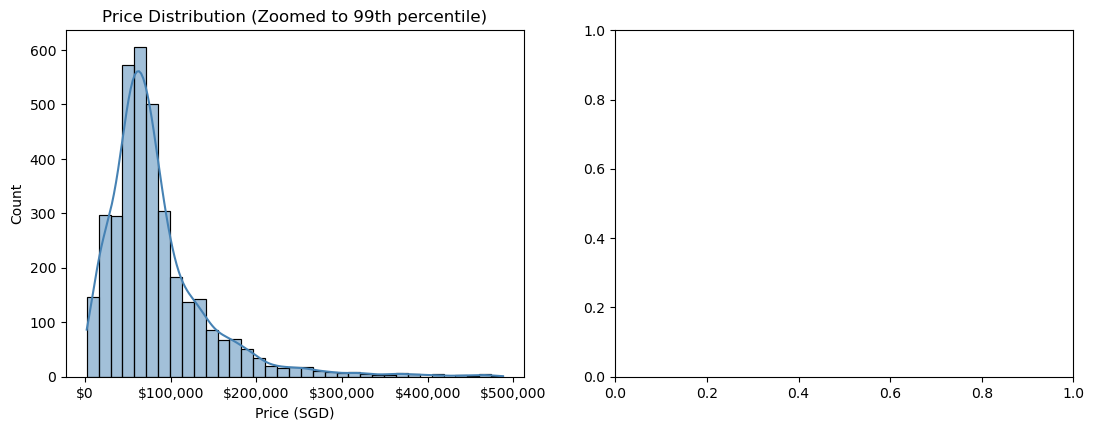

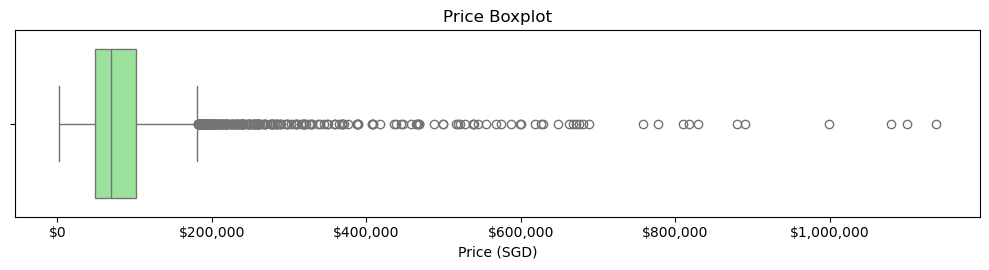

In [7]:
## 2.3.1.1 Distribution of target (Price)
from matplotlib.ticker import FuncFormatter

col_y = "Price"
df_eda[col_y] = pd.to_numeric(df_eda[col_y], errors="coerce")  
target = df_eda[col_y].dropna() 

print("Price skewness:", round(target.skew(), 3))

# Formatter for readable SGD axis labels
def sgd_fmt(x, pos): # e.g., 120000 -> $120,000
    return f"${x:,.0f}"

fig, ax = plt.subplots(1, 2, figsize=(13, 4.5))

# Left: zoomed histogram (to 99th percentile) for clearer bar shape
p99 = target.quantile(0.99)
sns.histplot(target[target <= p99], bins=35, kde=True, ax=ax[0], color="steelblue") # zoomed histogram 
ax[0].set_title("Price Distribution (Zoomed to 99th percentile)")
ax[0].set_xlabel("Price (SGD)")
ax[0].set_ylabel("Count")
ax[0].xaxis.set_major_formatter(FuncFormatter(sgd_fmt))


# Boxplot in SGD format
plt.figure(figsize=(10, 2.8)) # wide figure for boxplot
sns.boxplot(x=target, color="lightgreen")
plt.title("Price Boxplot")
plt.xlabel("Price (SGD)")
plt.gca().xaxis.set_major_formatter(FuncFormatter(sgd_fmt))
plt.tight_layout()
plt.show()


### 2.3.1.2 Understanding distribution of features and relationships

In my feature distribution analysis, I showed that numeric variables are not uniformly distributed, and several are right-skewed, especially market value-related columns, such as the open market value, the COE, and the deregistration value, which indicates that there's a high value of, there's presence of high-value vehicles and outliers in my dataset. Vehicle condition columns, such as mileage and vehicle age, also show widespread, which suggests that strong variation in listing quality and remain value also skew the dataset. The box plots confirm outliers across multiple numeric features, which support using robust modeling approaches and careful preprocessing. For categorical variables, frequency bars show imbalance in type, transmission, and brand name, which means that some categories dominate while other categories are rare. This justifies grouping and dimensionality reduction for premium and non-premium cars before modeling.

EDA Analysis:
1. Numeric Features Distribution Histogram
- In our numeric feature distribution histogram, the histogram shows that most numeric features are non-normal and mostly right-skewed, with large concentration in common market ranges and long tails of rare high values, which correlates with our previous EDA analysis of a majority of data falling within the interquartile range of low to mid-tier cars with a large value of outliers. Mileage, road tax, deregister value, open market value, and ARF, especially show this long-tail behavior, indicating a mix of mainstream and high-end vehicles. Meanwhile, engine cap, curb weight, and power cluster in expected technical ranges, which remains consistent across cars, but it still contains extreme values which have differing conditions rather than the price of the car. Number of owners is discrete and heavily concentrated at low counts. Meanwhile, vehicle age and series left years show the lifecycle patterns rather than smooth normal distributions of the car, which reinforces that feature handling should account for outliers, skews, and outliers, instead of segments that are non-deterministic.

2. Numeric Feature Boxplots
- The locked scale box plots which I chose to enhance my spread data and outlier data confirm that there's a lot of outliers across numeric values, especially economic value features like open market value and derestricted value, and usage proxies like mileage and road tax. The white interquartile ranges for many columns indicate the real consistency in car listings and not just random variations. Features like number of owners, vehicle age, and CO left years appear more compact, but still show edge cases that can influence model fit. Overall, this supports my idea of using robust models and targeted feature selection through things like a tree model instead of a normal linear regression model, where assumptions may be inefficient and lead to a weaker model outcome.

3. Top 10 for the 3 columns
- Across all three columns I evaluated the top 10, there are three main takeaways. Firstly, for type categories, as in type of car, luxury sedan, midsize sedan, or SUV, which contain majority of the cars in our dataset, prevalence frequency, while compared to categories like truck, station wagon, and bus or minivan, which are relatively sparse. This means that raw one-hot encoding of all types can create weaker columns for minority classes. From a business perspective, this imbalance justifies grouping types into broader segments, which is what I will implement in my feature engineering later on. For example, grouping premium passenger versus mainstream versus commercial, so that I can keep signal alive while reducing all the possibilities of  curse of dimensionality.

- For transmission, it is something that's highly imbalanced, with auto overwhelmingly dominant and very few manual or electric entries. This distribution suggests that transmission has limited discriminatory power in our dataset. Because the minority classes are so little, there are points that they are not able to consistently shift price predictions. This aligns with my feature importance results that I put in my EDA, and it supports dropping transmission completely in my data preparation without losing meaningful predictive  performance.

- Lastly, for the brand, it is a very long-tailed data with a few brands having high listing counts and others, while some brands remain infrequent. This high imbalance can cause many one-hot encoding columns and unstable effects for low-frequency brands. Business-wise, it makes more sense to consolidate them in premium versus non-premium, even though the trade-off may give less accurate price for specific brands. Overall, premium brands tend to have a similar elevated price. Hence, when giving a prediction, it has to have a more stable model output than one with all the different brands it going through one-hot encoding, which increases dimensionality and overall reduces the impact of the brand, which may end up giving a premium and non-premium car the same price, which is not ideal. Therefore, choosing to go through with this feature engineering makes more sense and is supported by my EDA here.

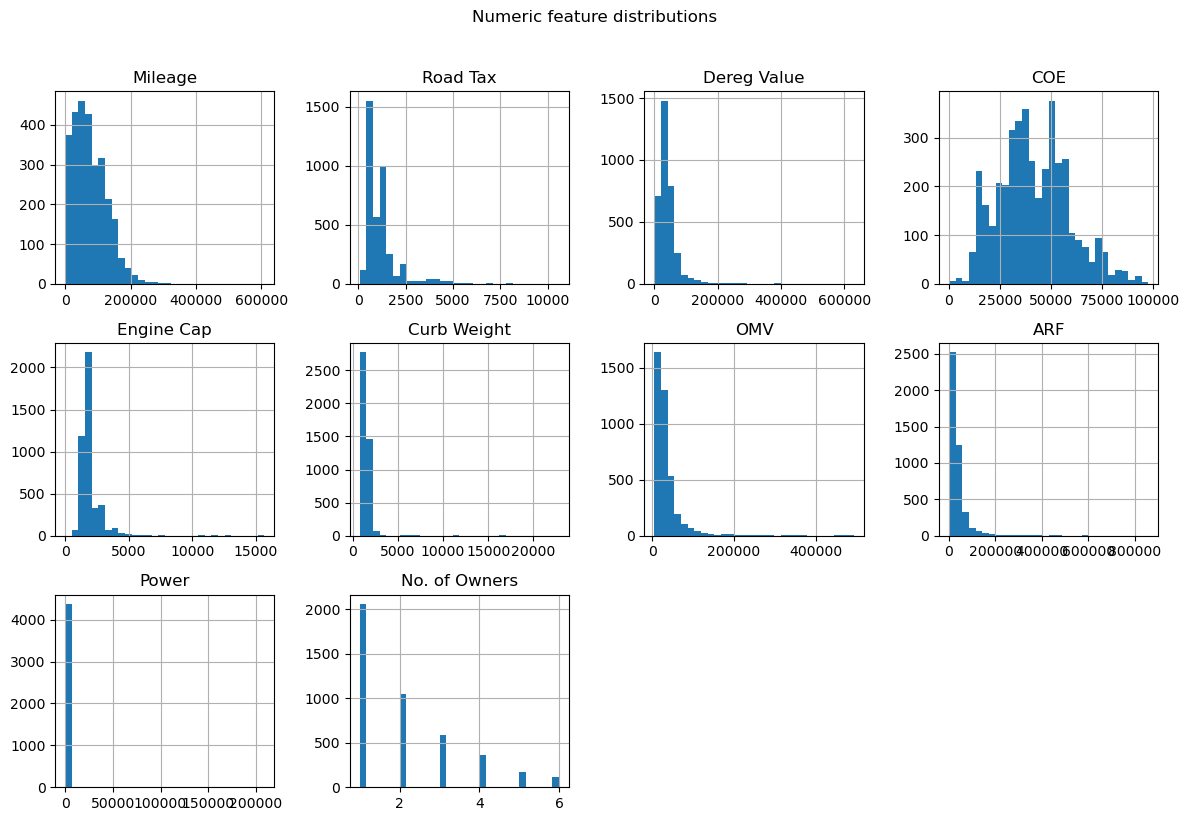

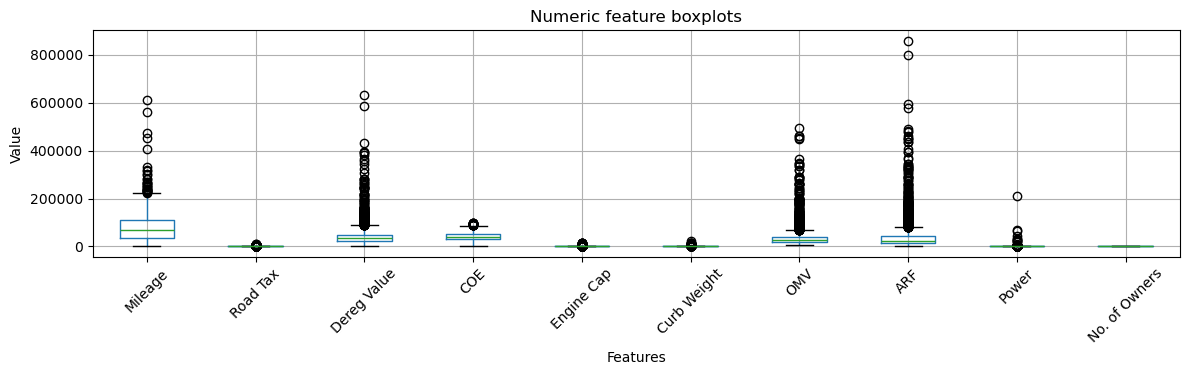

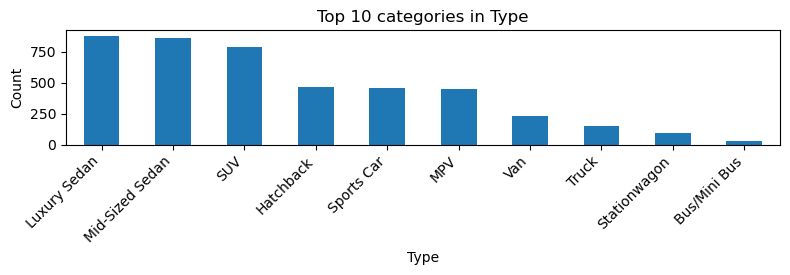

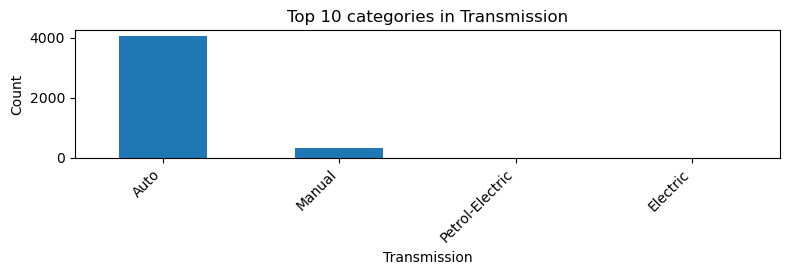

In [8]:
## Understanding distribution of features
num_features = [
    "Mileage", "Road Tax", "Dereg Value", "COE", "Engine Cap",
    "Curb Weight", "OMV", "ARF", "Power", "No. of Owners", "Vehicle_Age", "COE_Left_Years"
]
num_features = [c for c in num_features if c in df_eda.columns]

# ensure numeric
for c in num_features:
    df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce")

# Histograms
df_eda[num_features].hist(layout=(3, 4), figsize=(12, 8), bins=30)
plt.suptitle("Numeric feature distributions", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots (normal scale, no log)
df_eda[num_features].boxplot(rot=45, figsize=(12, 4))
plt.title("Numeric feature boxplots")
plt.suptitle("")
plt.xlabel("Features")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Categorical distribution for key columns
for col in ["Type", "Transmission", "Brand_Main"]:
    if col in df_eda.columns:
        plt.figure(figsize=(8, 3))
        df_eda[col].value_counts().head(10).plot(kind="bar")
        plt.title(f"Top 10 categories in {col}")
        plt.suptitle("")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


### 2.3.2 Understanding relationship between variables

In the next EDA cell, which focuses on my understanding of the relationship between variables, I go through a complete view of how features behave individually and how they can relate to our target, which is the price, before modeling. It first inspects the numeric feature distribution to see skewness, ranges, and outliers, before using a correlation heat map to detect useful relationships and possible redundancy among our numerical values. After that, targeted scatter plots, specifically for mileage, power, engine cap, road tax, vehicle age, all against price, review relationship direction and non-linearity between the numerical features and our price, which can help us justify our model choice beyond simple linear assumptions. Lastly, the type-based box plot, which shows categorical price separation across major vehicle groups, supports our segmentation-based feature engineering, as in premium versus non-premium grouping. Overall, this cell turns raw columns into  modeling insight. What to keep, what to simplify, and what patterns our model must learn.

EDA Analysis:
1. Numeric Feature Distribution
- For my first analysis, I go through the numeric feature distribution. Most numeric features are right-skewed with heavy concentration in our typical market ranges and long tails of anomalies. Similar to as discussed previously, the same values follow heavy tails which indicate what we have already known from our previous EDAs. Overall, to summarize, since I do not want to repeat what I've already covered, there is a strong influx between both our low to mid range, in our interquartile range, as well as the large amount of outliers that go towards our higher price or higher value for things such as mileage or road tax. This confirms what I said earlier about using robust modeling and careful feature selection, as it is not a linearly decided dataset.

2. Correlation Heatmap (Numerical Features)
 - In my correlation heatmap, I show meaningful positive relationships amongst our valuation variables, such as open market value, deregistration value, and price, and negative relationship patterns involving usage effects, like higher mileage, which tends to be lower in value. I also highlight multicollinearity between some value variables, which means that not all highly correlated features add unique signal. This supports our strategy of reducing redundant inputs for a cleaner deployable model, as it is not necessary that correlation equals causation, and it does not mean that our feature has a heavy impact on the model's predicted price just because of the correlation with the price.

 3. Features vs Price, scatter plots.
 - Across mileage, power, engine cap, all against price, the pattern is clear but it's also non-linear. Mileage shows a negative relationship, as in higher usage generally equals to lower prices, while power and engine cap show positive relationships in our main cluster, showing that higher performance slash higher spec vehicles tend to cost more. At the same time, all three plots have noticeable outliers, meaning cars with similar specs can still have very different prices due to other factors like brand, vehicle type, vehicle age, and listing conditions. Therefore, it indicates that these variables are important predictors, but should be used together in our multi-feature model, rather than standalone rules for a linear model.

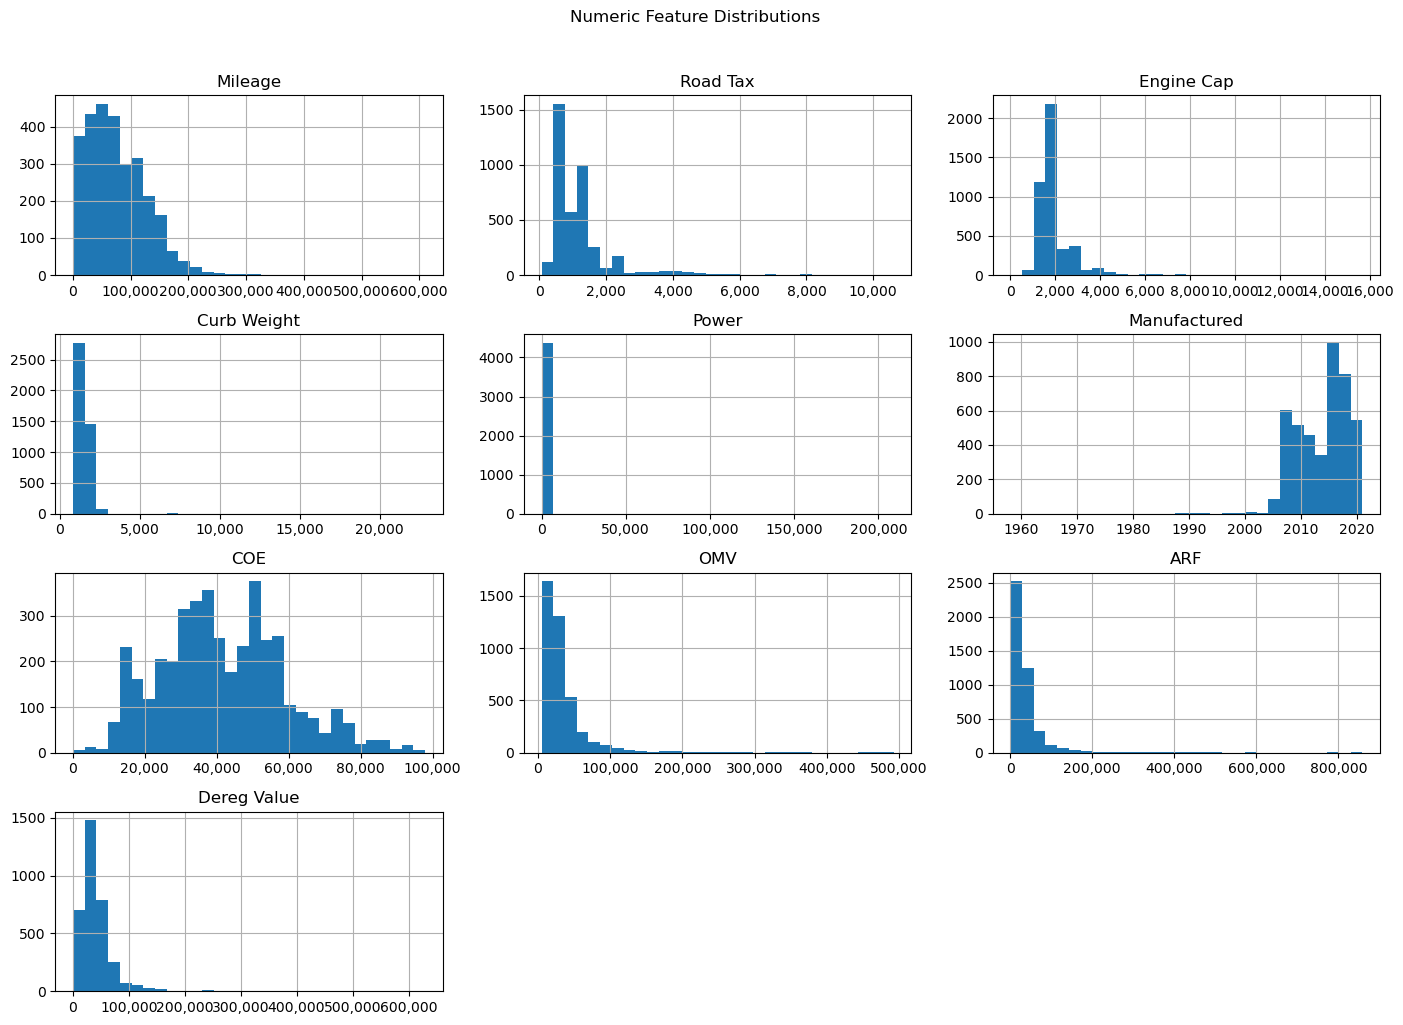

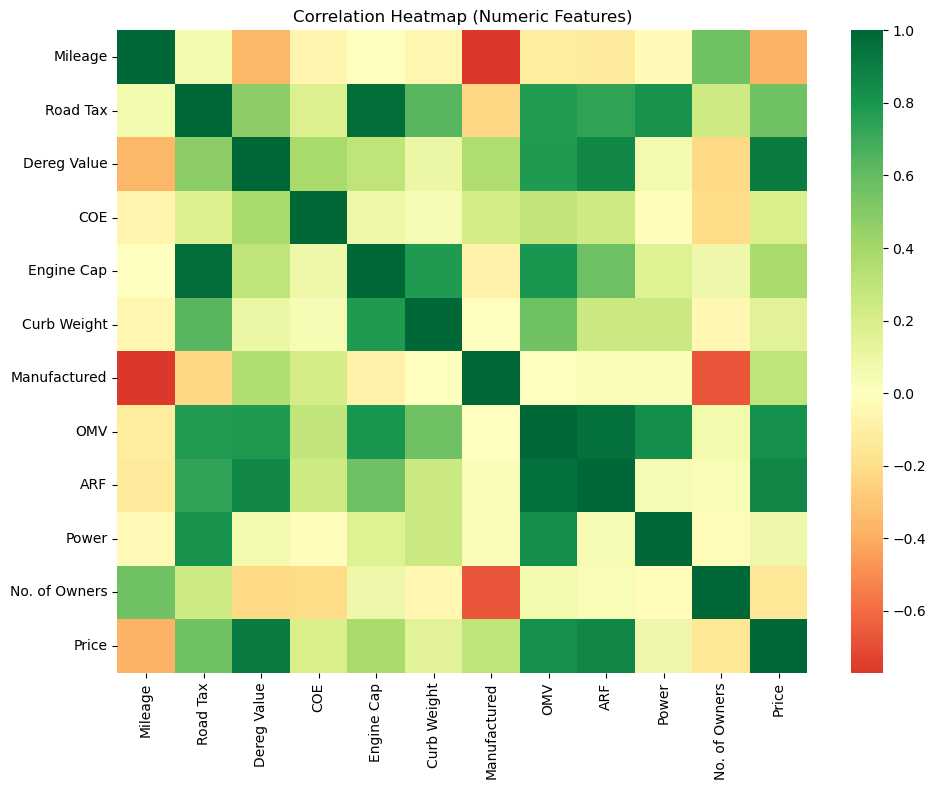

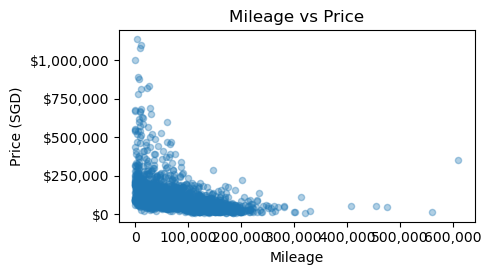

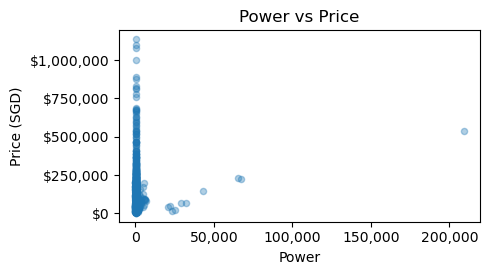

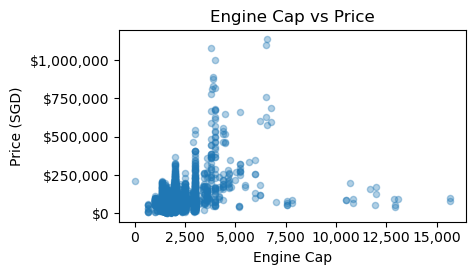

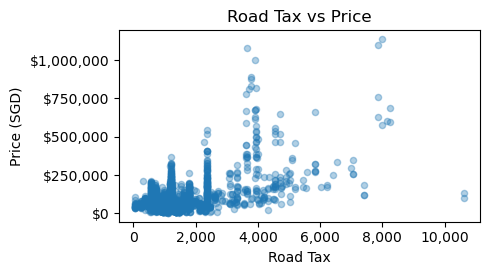

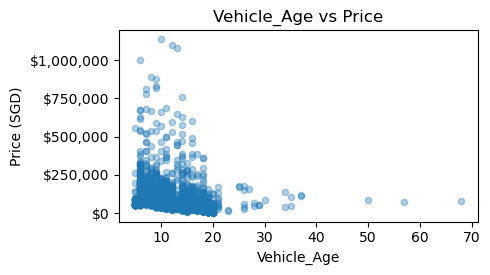

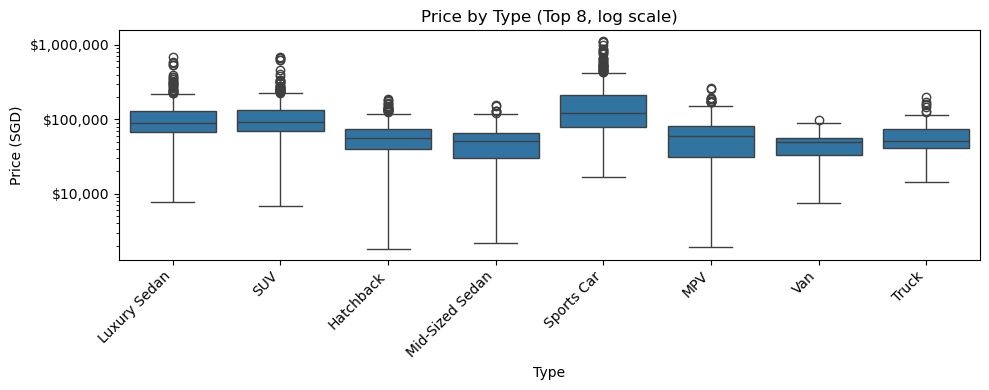

In [9]:
## 2.3.1.2 Distribution of features + key relationships
from matplotlib.ticker import FuncFormatter

# Formatter helpers
fmt_sgd = FuncFormatter(lambda x, pos: f"${x:,.0f}")
fmt_num = FuncFormatter(lambda x, pos: f"{x:,.0f}")

# 1) Numeric feature distributions (top useful columns)
num_cols = ["Mileage", "Road Tax", "Engine Cap", "Curb Weight", "Power", "Manufactured", "COE", "OMV", "ARF", "Dereg Value"]
num_cols = [c for c in num_cols if c in df_eda.columns]

for c in num_cols:
    df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce")

if num_cols:
    axes = df_eda[num_cols].hist(figsize=(14, 10), bins=30)
    axes = np.array(axes).flatten()
    for i, col in enumerate(num_cols):
        ax = axes[i]
        if col in ["OMV", "ARF", "Dereg Value", "Mileage", "COE", "Road Tax", "Engine Cap", "Curb Weight", "Power"]:
            ax.xaxis.set_major_formatter(fmt_num)
    plt.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout()
    plt.show()

# 2) Correlation heatmap (numeric only)
df_corr = df_eda.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap="RdYlGn", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

# 3) Key scatter plots vs target
def add_vehicle_age(df_input):
    out = df_input.copy()
    if "Vehicle_Age" not in out.columns and "Manufactured" in out.columns:
        out["Manufactured"] = pd.to_numeric(out["Manufactured"], errors="coerce")
        out["Vehicle_Age"] = pd.Timestamp("today").year - out["Manufactured"]
    return out

df_eda = add_vehicle_age(df_eda)

col_y = "Price"
df_eda[col_y] = pd.to_numeric(df_eda[col_y], errors="coerce")

key_x = ["Mileage", "Power", "Engine Cap", "Road Tax", "Vehicle_Age"]
key_x = [c for c in key_x if c in df_eda.columns]

for col_x in key_x:
    ax = df_eda.plot(x=col_x, y=col_y, kind="scatter", alpha=0.35, figsize=(5, 3))
    ax.yaxis.set_major_formatter(fmt_sgd)  # Price axis
    if col_x in ["Mileage", "Power", "Engine Cap", "Road Tax"]:
        ax.xaxis.set_major_formatter(fmt_num)
    plt.title(f"{col_x} vs {col_y}")
    plt.suptitle("")
    plt.xlabel(col_x)
    plt.ylabel("Price (SGD)")
    plt.tight_layout()
    plt.show()

# 4) Simple categorical view: Price by Type (top 8)
if "Type" in df_eda.columns:
    top_types = df_eda["Type"].value_counts().head(8).index
    plt.figure(figsize=(10, 4))
    ax = sns.boxplot(data=df_eda[df_eda["Type"].isin(top_types)], x="Type", y="Price")
    plt.yscale("log")
    ax.yaxis.set_major_formatter(fmt_sgd)
    plt.title("Price by Type (Top 8, log scale)")
    plt.xlabel("Type")
    plt.ylabel("Price (SGD)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# 3. Data Preparation

This next cell prepares my dataset so that modeling is reliable and consistent. It starts by identifying my key numeric columns and forcing them into numeric format, which is necessary because sometimes scraped listing data, such as this dataset, often contains mixed types or invalid strings. It then applies focused cleaning logic to reduce noise, like treating impossible power values as missing rather than keeping corrupted entries. Next, it creates more meaningful features for analysis. For example, registration age is converted to vehicle age, which is, one, more predictive, and two, easier to interpret, especially later on for training our model and for our deployment. Brand names are simplified into a main brand token to reduce all the categorical data that could come up after one-hot encoding. And serially remaining text is converted into numeric years for quantitative use. Finally, I've put a descriptive summary, which is a validation checkpoint to verify that all our conversions work by a data frame to check realistic value ranges and detect anomalies early. Overall, this cell is justified, as I believe it turns raw, inconsistent listing fields from our dataset into more structured data, which is ready for data analysis variables, by pandas, with proper analysis variables, in clear real business meaning and better utility for our model.


More is explained through the comments of my code as I go through it in the cell.

In [10]:

numeric_cols = [
    "Dep", "Mileage", "Road Tax", "Dereg Value", "COE", "Engine Cap",
    "Curb Weight", "Manufactured", "OMV", "ARF", "Power", "No. of Owners", "Price" # set the cols of numeric interest here
]
numeric_cols = [c for c in numeric_cols if c in df_eda.columns] # filter to only those present, in case of changes

for c in numeric_cols:
    df_eda[c] = pd.to_numeric(df_eda[c], errors="coerce")  # ensure numeric

# Power has some concatenated values from raw source; treat impossible values as missing
if "Power" in df_eda.columns:
    df_eda.loc[df_eda["Power"] > 1000, "Power"] = np.nan  # assuming >1000 hp is invalid here

# Convert registration date to vehicle age (more useful than raw date)
if "Reg_date" in df_eda.columns:
    df_eda["Reg_date"] = pd.to_datetime(df_eda["Reg_date"], format="%d-%b-%y", errors="coerce") 
    df_eda["Vehicle_Age"] = (pd.Timestamp("today") - df_eda["Reg_date"]).dt.days / 365.25

# Extract main brand to reduce cardinality from full car title
if "Brand" in df_eda.columns:
    df_eda["Brand_Main"] = df_eda["Brand"].astype(str).str.split().str[0]

# Parse COE left text into numeric years
if "Coe_left" in df_eda.columns:
    temp = df_eda["Coe_left"].astype(str).str.lower()
    yrs = pd.to_numeric(temp.str.extract(r"(\d+)\s*yr")[0], errors="coerce").fillna(0)
    mths = pd.to_numeric(temp.str.extract(r"(\d+)\s*mth")[0], errors="coerce").fillna(0)
    days = pd.to_numeric(temp.str.extract(r"(\d+)\s*day")[0], errors="coerce").fillna(0)
    df_eda["COE_Left_Years"] = yrs + (mths / 12) + (days / 365)

print(df_eda[numeric_cols].describe().T[["count", "mean", "std", "min", "50%", "max"]]) # basic stats for numeric columns


                count          mean           std     min      50%        max
Dep            3625.0  13754.907586  17494.047548  4680.0  10240.0   503000.0
Mileage        2840.0  77079.876761  54376.610102     1.0  68459.5   610000.0
Road Tax       3968.0   1237.023185    992.514687    70.0    958.0    10611.0
Dereg Value    3446.0  42112.633488  38119.108774    57.0  35640.0   629526.0
COE            4138.0  41600.123490  17305.067599    10.0  39728.0    97889.0
Engine Cap     4393.0   1993.687457    979.951449     0.0   1598.0    15681.0
Curb Weight    4330.0   1506.733949    754.984695   800.0   1425.0    22840.0
Manufactured   4391.0   2013.660442      4.534824  1958.0   2015.0     2021.0
OMV            3978.0  34965.817496  36092.489175  5220.0  25259.0   492350.0
ARF            4393.0  37582.503984  48016.867137     1.0  24942.0   858230.0
Power          4036.0    134.662042    106.320034     1.0    106.0     1000.0
No. of Owners  4339.0      2.054621      1.313656     1.0      2

## 3.1 Data Cleaning

This next cell is my core data straight construction and data cleaning, where I convert the raw source table of my dataset, df, into a clean, consistent, train-ready dataset for my model, which I will name df_model. The overall objective for this cell is to ensure that the model is ready to learn from valid signals instead of inconsistent data and scraping artifacts. It's structured in a logical sequence. 

First, I will remove malformed rows, standardize missing values, and force numeric types, before I move on to engineering useful features, removing non-essential columns, and then applying missing data decisions. This order matters because each step depends on what the previous one does, and ensuring that it is cleaned each step. The first part removes malformed rows, flagged by unnamed column 18, which is a typical scrape shift artifact when the dataset comes from a scrape source. For example, this dataset was scraped from SGCarMart. There are some rows that are misaligned and have an extra column, and it slightly corrupts our feature values. So dropping this unnamed 18 is a high-quality safeguard. Next, I standardize placeholders. In this dataset, there are many ways that the author has labeled missing values, n.a, dash, empty strings, etc. Converting all of these to NaN, not a number, is essential because pandas null handling only works correctly when the missingness is correctly represented. Without this, the model would treat placeholder strings like real category values. 

Now, numeric-like columns are forced cast to numeric. This ensures that values used in regression are true numbers and that invalid entries become missing instead of causing parsing failures or hidden type issues. This is particularly important in our market dataset where columns can mix symbols like the dollar symbol, comma in numbers, or non-numeric text. For my modeling integrity, this step also prevents subtle bugs and gives good downstream behavior. 

 Feature engineering is intentionally lightweight and business-aligned. 
 
 1. Converting registration date to vehicle age turns a raw timestamp into a directly interpretable depreciation signal, which is more useful for our model training.
 
 2. Extracting brand main from full brand text reduces categorical noise and supports later segmentation, such as premium versus non-premium. This is important, as if we took every brand and every model, it would lead to curse of dimensionality and many, many columns. Therefore, first, link up into brand, and later on when we transform it into premium and not premium, it will help simplify representation while also maintaining our model, our column signal, which improves both explainability and model quality. 
 
 My irrelevant column drop step reflects product and modeling decisions, not just cleanup. Columns like COE, open market value, deregistration value, ARF,  DEP and COE left a high volatility and depend on real-world and are constantly changing and do not fit well in this dataset. Removing them here and forces that my consumer-based model focuses solely on the car value based on the specs of the car and not modern policy or outside price like COE. . My missing value strategy is very explicit and I defend it, no, not defend, I justify it with one, rows with a missing target are dropped because supervised learning cannot train on an unknown label. Next, features with high missingness, more than 40%, are dropped, so I can avoid unreliable imputation when calculating that column because of these variables. Next, remaining numeric nulls are computed with the median, which is more in line with our skewed dataset as we explained in our EDA earlier. Lastly, remaining categorical nulls are computed with mode, which is the most common practical category. This is standard that correctly balances data retention without introducing complex methods. 

 Finally, the before-after missing value and final shape print are good practices for reproducibility. They give transparent evidence of what was removed, what was computed, and what is our final dataset size after all of these data cleaning steps. In terms of my project evaluation, this cell demonstrates clear pre-processing and controlled assumptions while also giving observable data quality improvement. In business terms, it increases confidence that predictions are based on structured, meaningful inputs rather than inconsistent data from the raw listing.

 Specifics are mapped out in the code as comments.

In [11]:
## Data cleaning (single source: df -> df_model)
col_y = "Price"
df_model = df.copy()

# 1) Remove malformed rows and junk column
if "Unnamed: 18" in df_model.columns:
    malformed_mask = df_model["Unnamed: 18"].notna()
    print("Malformed rows removed:", int(malformed_mask.sum()))
    df_model = df_model.loc[~malformed_mask].copy()
    df_model = df_model.drop(["Unnamed: 18"], axis=1)

# 2) Standardize missing-value tokens
df_model = df_model.replace(["N.A", "N.A.", "NA", "na", "-", ""], np.nan)

# 3) Convert numeric-like columns
numeric_cols = [
    "Dep", "Mileage", "Road Tax", "Dereg Value", "COE", "Engine Cap",
    "Curb Weight", "Manufactured", "OMV", "ARF", "Power", "No. of Owners", "Price"
]
numeric_cols = [c for c in numeric_cols if c in df_model.columns]
for c in numeric_cols:
    df_model[c] = pd.to_numeric(df_model[c], errors="coerce") 

# 4) Engineer useful features
if "Reg_date" in df_model.columns:
    df_model["Reg_date"] = pd.to_datetime(df_model["Reg_date"], format="%d-%b-%y", errors="coerce")
    df_model["Vehicle_Age"] = (pd.Timestamp("today") - df_model["Reg_date"]).dt.days / 365.25

if "Brand" in df_model.columns:
    df_model["Brand_Main"] = df_model["Brand"].astype(str).str.split().str[0] # extract main brand from the full car moel

# 5) Drop irrelevant columns before modeling
col_irrelevant = [
    "Dep", "Reg_date", "Coe_left", "Brand",
    "COE", "OMV", "ARF", "Dereg Value", "COE_Left_Years"
]
col_irrelevant = [col for col in col_irrelevant if col in df_model.columns] 
df_model = df_model.drop(col_irrelevant, axis=1)

# 6) Missing-value decisions
missing_count = df_model.isna().sum()
missing_pct = (df_model.isna().mean() * 100).round(2)
missing_table = pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct}).sort_values("missing_pct", ascending=False)
print("Missing-value table before handling:")
print(missing_table[missing_table["missing_count"] > 0])

# 6a) Drop rows with missing target
df_model = df_model.dropna(subset=[col_y]).copy()

# 6b) Drop feature columns with > 40% missing
feature_missing_pct = (df_model.drop(columns=[col_y], errors="ignore").isna().mean() * 100)
col_drop_high_missing = feature_missing_pct[feature_missing_pct > 40].index.tolist()
if col_drop_high_missing:
    print("Dropping high-missing features:", col_drop_high_missing)
    df_model = df_model.drop(columns=col_drop_high_missing)
else:
    print("No feature exceeds 40% missing.")

# 6c) Fill remaining missing values
col_numeric = [c for c in df_model.select_dtypes(include=["int64", "float64"]).columns if c != col_y]
col_categorical = df_model.select_dtypes(include=["object"]).columns

for col in col_numeric:
    if df_model[col].isna().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].median()) # fill numeric with median becasue it is robust to outliers 

for col in col_categorical:
    if df_model[col].isna().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].mode().iloc[0]) #fille rest with mode because categorical variables

print("\nMissing values after cleaning:")
print(df_model.isna().sum()[df_model.isna().sum() > 0])
print("Cleaned df_model shape:", df_model.shape)
df_model.head() # display cleaned dataframe for modeling



Malformed rows removed: 15
Missing-value table before handling:
               missing_count  missing_pct
Mileage                 1556        35.40
Price                    720        16.38
Road Tax                 428         9.74
Curb Weight               66         1.50
No. of Owners             57         1.30
Power                      8         0.18
Vehicle_Age                6         0.14
Manufactured               5         0.11
Engine Cap                 3         0.07
No feature exceeds 40% missing.

Missing values after cleaning:
Series([], dtype: int64)
Cleaned df_model shape: (3676, 12)


,Type,Mileage,Road Tax,Engine Cap,Curb Weight,Manufactured,Transmission,Power,No. of Owners,Price,Vehicle_Age,Brand_Main
0,Luxury Sedan,68239.5,1210.0,1997.0,1610.0,2013.0,Auto,135.0,1.0,54000.0,12.709103,BMW
1,SUV,50000.0,682.0,1496.0,1190.0,2015.0,Auto,96.0,2.0,49800.0,10.329911,Honda
2,Hatchback,110000.0,742.0,1598.0,1100.0,2011.0,Auto,72.0,3.0,62800.0,14.349076,MINI
4,Hatchback,203000.0,1030.0,1586.0,1060.0,2007.0,Manual,92.0,2.0,12800.0,18.124572,Suzuki
5,Sports Car,21000.0,1200.0,1988.0,1365.0,2017.0,Auto,220.0,1.0,259988.0,8.566735,Porsche


This next cell is my final data preparation design step, where I intentionally convert the clean dataset into a more business-meaningful feature matrix and target X and Y, respectively. Unlike the normal pre-processing, this cell reflects my model strategy, which is to reduce noise, control dimensionality, and keep only features that are both useful and explainable in my deployment. I start from df_model.copy(), which preserves the clean source while safely building a separate modeling view, df_final. The target is fixed as price, which clearly defines the supervised regression planned. From there on, brand information is transformed into a binary segment, as in luxury brand, instead of one-hot encoding across many brands. This is a pretty strong trade-off. It allows me to retain premium versus mainstream market signal while avoiding sparse columns and unstable effects from rare brands, but I also lose the ability to keep track of different brands' boostings. However, I believe that is a suitable decision, as many of the luxury brands tend to have the same price impact based on their brand. This same principle is applied to the vehicle type. Instead of treating every type as a separate, which would need another set of one-hot encoding, I map the different types into a group category and only keep the premium passenger indicator and the commercial and mainstream. These two groups are the ones that have the most varying prices, and hence, grouping in this way improves robustness. As the cars generally maintain their value, we thought that big of a difference. And it also makes it clear for stakeholders and app users which category their car falls into.

 My cell also explicitly removes fields that are not intended for my final model input, such as raw type, transmission, number of owners, and target. This prevents duplicate representation and also avoids weak or noisy contributors. Separating Y and X for any stage keeps the pipeline clean and stops any accidental leakage of target columns into the features. Next, encoding is done with one-hot encoding only on our remaining columns, categorical columns, which is correct and controlled. My two big has already determined categorical for the features that had many different types, and one-hot encoding here will remain compact as it will only need to filter it within their groups and not each branch individually. My final filtering step, keep features, is especially important as it enforces feature selection based on the importance of the feature rather than keeping every engineered column. This means the deployed model only uses columns with demonstrated predictive value, which simplifies UI inputs for the user and makes model behavior easier to justify. .
 
 The final shape and selected column printouts serve as reproducibility checkpoints. I can verify exactly what the model is trained on and ensure that the model export, my notebook, and streamlit all have the same alignment. This way is justified because it turns a clean dataset into a deployment-ready feature set, which balances our different fields that we need, such as predictive performance, interpretability, and business usability.

In [12]:
## FIXED DATA PREPARATION & ENCODING (Reduced Feature Set)
# Goal: keep only impactful features from feature-importance analysis.

df_final = df_model.copy() # final cleaned df for modeling
col_y = "Price"

# 1) Brand -> binary (premium vs non-premium)
luxury_brands = {
    "Mercedes-Benz", "BMW", "Audi", "Lexus", "Porsche", "Jaguar", "Land", "Maserati",
    "Bentley", "Ferrari", "Lamborghini", "Rolls-Royce", "Aston", "McLaren", "Infiniti" # luxury brands from dataset
}
if "Brand_Main" in df_final.columns:
    df_final["Luxury_Brand"] = df_final["Brand_Main"].isin(luxury_brands).astype(int) # 1 if luxury, 0 otherwise
else:
    df_final["Luxury_Brand"] = 0 # default to non-luxury if Brand_Main not present

# 2) Type -> grouped, then keep only premium-passenger dummy
type_group_map = { # mapping of Type to Type_Group
    "Sports Car": "Premium_Passenger",
    "SUV": "Premium_Passenger",
    "Luxury Sedan": "Premium_Passenger",
    "Mid-Sized Sedan": "Non_Premium",
    "Hatchback": "Non_Premium",
    "MPV": "Non_Premium",
    "Stationwagon": "Non_Premium",
    "Others": "Non_Premium",
    "Van": "Non_Premium",
    "Truck": "Non_Premium",
    "Bus/Mini Bus": "Non_Premium",
}
if "Type" in df_final.columns:
    df_final["Type_Group"] = df_final["Type"].map(type_group_map).fillna("Non_Premium") # default to Non_Premium if unmapped

# 3) Separate X and y; drop irrelevant/high-noise columns before OHE
col_drop_for_model = [col_y, "Brand_Main", "Type", "Transmission", "No. of Owners"]
col_drop_for_model = [c for c in col_drop_for_model if c in df_final.columns]

y = df_final[col_y]
X_raw = df_final.drop(columns=col_drop_for_model)

# 4) OHE only for remaining categorical columns (Type_Group)
col_categorical_final = X_raw.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X_raw, columns=col_categorical_final, drop_first=True, dtype=int)

# 5) Keep only impactful features (from FI chart)
keep_features = [
    "Road Tax",
    "Mileage",
    "Power",
    "Vehicle_Age",
    "Luxury_Brand",
    "Engine Cap",
    "Curb Weight",
    "Manufactured",
    "Type_Group_Premium_Passenger",
]
keep_features = [c for c in keep_features if c in X.columns]
X = X[keep_features].copy()

print(f"Original df_final shape: {df_final.shape}")
print(f"X shape after OHE + feature selection: {X.shape}")
print("Selected feature columns:")
print(X.columns.tolist())


Original df_final shape: (3676, 14)
X shape after OHE + feature selection: (3676, 9)
Selected feature columns:
['Road Tax', 'Mileage', 'Power', 'Vehicle_Age', 'Luxury_Brand', 'Engine Cap', 'Curb Weight', 'Manufactured', 'Type_Group_Premium_Passenger']


### Feature Engineering Rationale
- `Brand_Main -> Luxury_Brand (0/1)`: reduces dimensionality and keeps practical pricing signal.
- `Type -> Type_Group_Premium_Passenger`: avoids sparse OHE columns and keeps meaningful segmentation.
- Dropped `Transmission` and `No. of Owners`: low feature importance and weak impact in this dataset.
- Kept high-impact numeric features (based on feature-importance chart) to improve generalization and app simplicity.


## 3.2 Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

## Select X and y (already prepared in previous cell)
X = X.copy()
y = y.copy()

## Check unique values in categorical features (before encoded training split)
if "X_raw" in globals():
    categorical_features = X_raw.select_dtypes(include=["object"]).columns.tolist()
    for feature in categorical_features:
        unique_values = X_raw[feature].dropna().unique()
        print(f"Feature: {feature}, Unique Values: {unique_values}")
else:
    categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
    for feature in categorical_features:
        unique_values = X[feature].dropna().unique()
        print(f"Feature: {feature}, Unique Values: {unique_values}")

## Split data into train and test sets
test_size = 0.3
random_state = 2025  # reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state
)

# compatibility aliases if needed in later cells/examples
X_train_enc, X_test_enc = X_train, X_test


## in this cell, we perform train-test split on the prepared dataset. first, we check the unique values
# in categorical features to ensure they are as expected before splitting. then, we use sklearn's
# train_test_split function to divide the data into training and testing sets, with 30% of the data
# reserved for testing. a random state is set for reproducibility of results.


Feature: Type_Group, Unique Values: ['Premium_Passenger' 'Non_Premium']


# 4. Modelling

### 4.2 Train Model

This cell establishes model diversity by training three distinct regression algorithms: LinearRegression (baseline linear model), DecisionTreeRegressor (single non-linear model), and RandomForestRegressor (ensemble non-linear model with n_estimators=300). The baseline model is important because it provides a reference point for whether more complex models do improve performance. Decision Tree and Random Forest are included because my EDA showed non-linear patterns and interacti between predictors and Price (for example, spread across mileage) which linear models may underfit. The setup is also reproducible and fixed random_state values (42, 2025) ensure repeatable training outcomes, and n_jobs=-1 for Random Forest improves training efficiency for iterations.This cell does not decide the final model yet; instead, it creates a controlled, comparable set of candidates so the next evaluation section can report numeric test metrics (MAE, RMSE, R²) and select the best model based on measurable business error and generalization performance.


In [14]:
## Initialise and train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Model 1: Linear Regression (baseline)
linr = LinearRegression(fit_intercept=True)
linr.fit(X_train, y_train)

## Model 2: Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_enc, y_train)

## Model 3: Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=2025, n_jobs=-1)
rf.fit(X_train, y_train)

print("Training complete: Linear Regression, Decision Tree, and Random Forest")

# The reason why I used DecisionTree, & RandomForrest is justified 
# by their ability to capture non-linear relationships and interactions
# between features, which are common in our data set, which I went through thoroughly  in EDA.


Training complete: Linear Regression, Decision Tree, and Random Forest


# 5. Model Evaluation

This cell evaluates all three trained models on the same test set using MAE, MSE, RMSE, and R² so the comparison is fair and evidence-based.

Linear Regression (baseline):
MAE = 28,032.36, RMSE = 52,883.62, R² = 0.5989
Decision Tree:
MAE = 16,687.88, RMSE = 41,059.99, R² = 0.7582
Random Forest:
MAE = 12,638.00, RMSE = 31,622.59, R² = 0.8566

both non-linear models outperform the linear baseline, which matches EDA findings that relationships are non-linear. Decision Tree improves MAE by 40.47% vs Linear Regression, while Random Forest improves MAE by 54.92% vs Linear Regression and by 24.27% vs Decision Tree. Random Forest also has the lowest RMSE and highest R², meaning it is best at both reducing large errors and explaining variance in price. From a business perspective, MAE is the most actionable metric because it represents average SGD prediction error directly; therefore, Random Forest is the strongest candidate before tuning and final selection.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

## Evaluate model 1: Linear Regression
y_pred_linr = linr.predict(X_test)
E_linr = y_pred_linr - y_test
print("Linear Regression Errors (first 10):")
print(E_linr.head(10))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linr)))
print("Linear Regression R2:", r2_score(y_test, y_pred_linr))

## Evaluate model 2: Decision Tree
y_pred_dt = dt.predict(X_test_enc)
E_dt = y_pred_dt - y_test
print("\nDecision Tree Errors (first 10):")
print(E_dt.head(10))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

## Evaluate model 3: Random Forest
y_pred_rf = rf.predict(X_test)
E_rf = y_pred_rf - y_test
print("\nRandom Forest Errors (first 10):")
print(E_rf.head(10))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression Errors (first 10):
2159     5152.839441
2849    20444.958333
238     21645.802592
3488    -7240.787918
3985    23594.869132
3420    10111.068108
4031     3372.804251
1745    24070.280280
790      6963.355481
3385    40452.698009
Name: Price, dtype: float64
Linear Regression MAE: 28032.358717610117
Linear Regression MSE: 2796677304.719211
Linear Regression RMSE: 52883.62038211086
Linear Regression R2: 0.5988969485622919

Decision Tree Errors (first 10):
2159    -5000.0
2849    -1000.0
238    -14300.0
3488    19000.0
3985     8912.0
3420        0.0
4031    -2912.0
1745     8200.0
790     10000.0
3385     3300.0
Name: Price, dtype: float64
Decision Tree MAE: 16687.881233000906
Decision Tree MSE: 1685922503.5893018
Decision Tree RMSE: 41059.98664867418
Decision Tree R2: 0.7582028289298599

Random Forest Errors (first 10):
2159     2109.796667
2849     -633.653333
238     -8640.063333
3488    10817.636667
3985     8829.426667
3420     -579.053333
4031     -648.330000
1745 

This cell checks on the models by detecting the behavior on unseen test data by placing actual prices and all three model predictions side-by-side, then computing absolute error per model for each case. 

Unlike MAE and RMSE , this view helps identify practical error patterns, such as whether one model consistently over/underestimates specific listing types or whether large misses are concentrated in high-price outliers. It also supports qualitative model comparison. I can see that Random Forest tends to have smaller absolute errors in more cases, consistent with its lower overall MAE/RMSE.

 In business terms, this table shows model performance into a list outcome/frame, making it easier to explain prediction reliability to stakeholders beyond summary statistics alone.

In [16]:
## Test-set prediction preview (first 10 rows)
df_prediction = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted (Linear Regression)": y_pred_linr,
    "Predicted (Decision Tree)": y_pred_dt,
    "Predicted (Random Forest)": y_pred_rf,
})

df_prediction["Abs Error (Linear)"] = (df_prediction["Predicted (Linear Regression)"] - df_prediction["Actual Price"]).abs()
df_prediction["Abs Error (DT)"] = (df_prediction["Predicted (Decision Tree)"] - df_prediction["Actual Price"]).abs()
df_prediction["Abs Error (RF)"] = (df_prediction["Predicted (Random Forest)"] - df_prediction["Actual Price"]).abs()

df_prediction.head(10)


,Actual Price,Predicted (Linear Regression),Predicted (Decision Tree),Predicted (Random Forest),Abs Error (Linear),Abs Error (DT),Abs Error (RF)
0,59800.0,64952.839441,54800.0,61909.796667,5152.839441,5000.0,2109.796667
1,58800.0,79244.958333,57800.0,58166.346667,20444.958333,1000.0,633.653333
2,88000.0,109645.802592,73700.0,79359.936667,21645.802592,14300.0,8640.063333
3,33800.0,26559.212082,52800.0,44617.636667,7240.787918,19000.0,10817.636667
4,52888.0,76482.869132,61800.0,61717.426667,23594.869132,8912.0,8829.426667
5,72800.0,82911.068108,72800.0,72220.946667,10111.068108,0.0,579.053333
6,84800.0,88172.804251,81888.0,84151.670000,3372.804251,2912.0,648.330000
7,41800.0,65870.280280,50000.0,40582.613333,24070.280280,8200.0,1217.386667
8,51800.0,58763.355481,61800.0,62227.543333,6963.355481,10000.0,10427.543333
9,46500.0,86952.698009,49800.0,58636.153333,40452.698009,3300.0,12136.153333


## Iterative model development


This cell performs structured hyperparameter optimization on Random Forest only using RandomizedSearchCV, with a reproducible setup (random_state=2025, cv=5) and had search space (each hyperparameter has ≤3 candidate values). The search sampled 20 candidates and ran 100 total fits (5 folds × 20 candidates). The optimization metric is neg_mean_absolute_error, which aligns with my business objective of minimizing average SGD prediction error.

From the tuning output, the best configuration was:

n_estimators = 300
criterion = 'absolute_error'
max_depth = 20
min_samples_split = 2
max_features = 'log2'
max_samples = 1.0

Best cross-validation score was mean_test_score = -13393.47, equivalent to CV MAE ≈ 13,393.47 SGD. The second-best candidate had mean_test_score = -13795.25 (CV MAE ≈ 13,795.25 SGD), so the best set improves CV MAE by about 401.78 SGD (about 2.91% better than runner-up). This indicates the selected settings consistently reduce average pricing error across folds, not just on one split.

Impact versus baseline untuned RF on my test set is also measurable:

Untuned RF: MAE = 12,638.00, RMSE = 31,622.59, R² = 0.8566
Tuned RF: MAE = 12,152.26, RMSE = 27,528.95, R² = 0.8913
So tuning reduced test MAE by 485.75 SGD (3.84%), reduced RMSE by 4,093.64 SGD (12.95%), and increased R² by 0.0347. This is a clear numeric improvement over baseline, justifying the tuned Random Forest as the stronger final model candidate for deployment.

In [17]:
## Hyperparameter tuning (RandomizedSearchCV, >=5 hyperparameters, <=3 values each)
from sklearn.model_selection import RandomizedSearchCV

# School requirement: no more than 3 values per hyperparameter
param_dist_rf = {
    "n_estimators": [300, 500, 700],
    "criterion": ["squared_error", "absolute_error"],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2", 1.0],
    "max_samples": [0.7, 0.85, 1.0]
}

rs_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=2025),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring="neg_mean_absolute_error",
    random_state=2025,
    n_jobs=1,
    verbose=1,
)

rs_rf.fit(X_train, y_train)
best_rs_params = rs_rf.best_params_
best_rs_rf = rs_rf.best_estimator_

print("Best Parameters:", best_rs_params)
print("Best Estimator:", best_rs_rf)

# Detailed tuning logs/table
df_tuning_logs = pd.DataFrame(rs_rf.cv_results_)[[
    "param_n_estimators",
    "param_criterion",
    "param_max_depth",
    "param_min_samples_split",
    "param_max_features",
    "param_max_samples",
    "mean_test_score",
    "std_test_score",
    "rank_test_score",
]]

# Convert neg MAE to MAE for readability
df_tuning_logs["cv_mae"] = -df_tuning_logs["mean_test_score"]
df_tuning_logs = df_tuning_logs.sort_values("rank_test_score")
print("Top tuning results:")
display(df_tuning_logs.head(10))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_samples': 1.0, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'absolute_error'}
Best Estimator: RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='log2', max_samples=1.0, n_estimators=300,
                      random_state=2025)
Top tuning results:


,param_n_estimators,param_criterion,param_max_depth,param_min_samples_split,param_max_features,param_max_samples,mean_test_score,std_test_score,rank_test_score,cv_mae
13,300,absolute_error,20,2,log2,1.00,-13393.473334,1016.958167,1,13393.473334
18,700,squared_error,20,2,1.0,1.00,-13795.248467,1375.852499,2,13795.248467
9,300,absolute_error,None,2,sqrt,0.70,-13846.204199,971.283135,3,13846.204199
10,300,absolute_error,20,5,log2,0.85,-13849.697248,1046.986263,4,13849.697248
14,700,squared_error,20,2,sqrt,0.70,-13878.466589,1072.584370,5,13878.466589
4,700,squared_error,20,5,log2,0.85,-13954.400991,1125.686746,6,13954.400991
1,300,squared_error,20,5,1.0,1.00,-13954.868108,1442.345919,7,13954.868108
3,700,absolute_error,None,5,sqrt,0.70,-14004.676499,1024.431951,8,14004.676499
11,300,squared_error,20,5,sqrt,0.70,-14163.259032,1085.166694,9,14163.259032
6,300,absolute_error,10,2,sqrt,0.85,-14234.693791,1132.888703,10,14234.693791


This cell is the main decision making cell for which model to use, where it is measured on business error .I compare the four models on the same test dataset using mean average error, root mean square error, and the R-squared value before I choose the final model and export it for deployment. For the quantitative comparison, I have sorted it by mean average error, where obviously lower is better.

Quantitative comparison
Sorted by MAE (lower is better):

Random Forest (Tuned): MAE 12,152.26, RMSE 27,528.95, R² 0.8913
Random Forest (Untuned): MAE 12,638.00, RMSE 31,622.59, R² 0.8566
Decision Tree (Baseline): MAE 16,687.88, RMSE 41,059.99, R² 0.7582
Linear Regression (Baseline): MAE 28,032.36, RMSE 52,883.62, R² 0.5989
Why tuned Random Forest is selected (numeric evidence)
Best business error (MAE):
Tuned RF has the lowest MAE (12,152.26 SGD), which means average prediction miss is smallest in dollar terms.

Improvement over untuned RF:

MAE improves by 485.75 SGD (3.84%)
RMSE improves by 4,093.64 SGD (12.95%)
R² increases by 0.0347 (from 0.8566 to 0.8913)
This confirms tuning gives impact not just noise to my model.
Improvement over Decision Tree baseline:

MAE improves by 4,535.63 SGD (27.18%)
RMSE improves by 13,531.03 SGD (32.95%)
R² increases by 0.1331
the ensemble clearly generalizes better than a single tree.
Improvement over Linear Regression baseline:

MAE improves by 15,880.10 SGD (56.65%)
RMSE improves by 25,354.67 SGD (47.94%)
R² increases by 0.2924
This strongly supports my EDA conclusion that relationships are non-linear and interaction-heavy based on the varying columns.

In [18]:
## Compare baseline vs untuned vs tuned (model selection evidence)
mae_linr = mean_absolute_error(y_test, y_pred_linr)
rmse_linr = np.sqrt(mean_squared_error(y_test, y_pred_linr))
r2_linr = r2_score(y_test, y_pred_linr)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

y_pred_rs_rf = best_rs_rf.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred_rs_rf)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rs_rf))
r2_tuned = r2_score(y_test, y_pred_rs_rf)

rows = [
    ["Linear Regression (Baseline)", mae_linr, rmse_linr, r2_linr],  #create frame wiht all terrors
    ["Decision Tree (Baseline)", mae_dt, rmse_dt, r2_dt],
    ["Random Forest (Untuned)", mae_rf, rmse_rf, r2_rf],
    ["Random Forest (Tuned)", mae_tuned, rmse_tuned, r2_tuned],
]

df_compare = pd.DataFrame(rows, columns=["Model", "MAE", "RMSE", "R2"]).sort_values("MAE") # sort by MAE ascending, so best model is on top
print(df_compare)

best_model_name = df_compare.iloc[0]["Model"]
print("Selected final model:", best_model_name)
print("Reason: lowest MAE (most interpretable SGD error for business users).")
print("Assumption: market-policy variables like live COE changes are excluded from model input and can be integrated in future via API.") # this assumption is important because it justifies why we are not including COE or ARF in the model, which are important market-policy variables that can change rapidly and are hard to predict. by excluding them, we make the model more stable and focused on intrinsic car features, while allowing for future integration of live market data via API if needed.

# Keep final model object for export
if best_model_name == "Random Forest (Tuned)":
    final_model = best_rs_rf
elif best_model_name == "Random Forest (Untuned)":
    final_model = rf
elif best_model_name == "Decision Tree (Baseline)":
    final_model = dt
else:
    final_model = linr

import joblib

MODEL_PATH = "car_price_model.pkl"
joblib.dump(final_model, MODEL_PATH) 

print(f"Model exported to: {MODEL_PATH}")


                          Model           MAE          RMSE        R2
3         Random Forest (Tuned)  12152.255542  27528.952959  0.891309
2       Random Forest (Untuned)  12638.000566  31622.588203  0.856580
1      Decision Tree (Baseline)  16687.881233  41059.986649  0.758203
0  Linear Regression (Baseline)  28032.358718  52883.620382  0.598897
Selected final model: Random Forest (Tuned)
Reason: lowest MAE (most interpretable SGD error for business users).
Assumption: market-policy variables like live COE changes are excluded from model input and can be integrated in future via API.
Model exported to: car_price_model.pkl


## 5.x Feature Importance (for UI feature selection)
Use the trained Random Forest feature importances to keep only impactful inputs in Streamlit and drop weak ones (e.g., Transmission).

This analysis is used as quantitive evidence for my feature selection and how i designed my deployment features and columns input. In the final Random Forest which was tuned, he top contributors are Vehicle_Age (0.1885), Power (0.1619), Mileage (0.1307), Curb Weight (0.1060), and Road Tax (0.1017) (from chart below). Secondary but still meaningful contributors are Manufactured (0.0938), Engine Cap (0.0875), Luxury_Brand (0.0799), and Type_Group_Premium_Passenger (0.0500)


Since all the selected features that I've stated here are above my practical cutoff of 0.01, it means that they are retained in the final model and reflect in the app's input logic. It confirms that both segmentation features, which we created earlier with our feature engineering, luxury brand and group type, as well as our data features that we've previously put, like power, mileage, vehicle age, all contribute measurably to our model training rather than acting as static variables with no input. The ranking also supports the business interpretation of what drives the price of each object, where depreciation, wind and age, or performance or use factors dominate pricing decisions, such as vehicle age, mileage, and power. Therefore, this cell justifies both the final reduced feature set and the front-end simplification with using direct numeric evidence from the trained model.

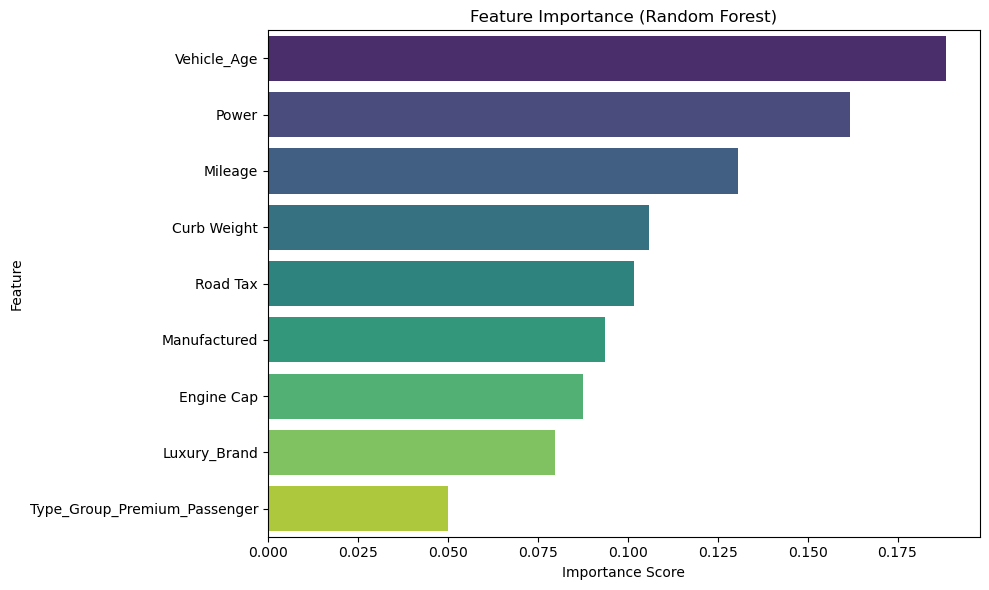

Top features:
Vehicle_Age                     0.1885
Power                           0.1619
Mileage                         0.1307
Curb Weight                     0.1060
Road Tax                        0.1017
Manufactured                    0.0938
Engine Cap                      0.0875
Luxury_Brand                    0.0799
Type_Group_Premium_Passenger    0.0500
dtype: float64

Selected (>= 0.01): ['Vehicle_Age', 'Power', 'Mileage', 'Curb Weight', 'Road Tax', 'Manufactured', 'Engine Cap', 'Luxury_Brand', 'Type_Group_Premium_Passenger']

UI Keep:
['Road Tax', 'Mileage', 'Power', 'Engine Cap', 'Curb Weight', 'Manufactured', 'Vehicle_Age', 'Luxury_Brand', 'Type_Group_Premium_Passenger']

UI Drop:
[]


In [19]:
# Feature importance from final trained model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pick whichever trained model exists in memory
if "final_model" in globals(): # if final_model exists (which it should), use it for feature importance 
    model_for_fi = final_model
elif "best_rs_rf" in globals():
    model_for_fi = best_rs_rf
elif "rf" in globals():
    model_for_fi = rf
else:
    raise ValueError("No trained tree-based model found. Run model training cells first.")

fi = pd.Series(
    model_for_fi.feature_importances_,
    index=model_for_fi.feature_names_in_
).sort_values(ascending=False) # create a series of feature importance scores, indexed by feature names, and sort descending

plt.figure(figsize=(10, 6))
sns.barplot(x=fi.head(14).values, y=fi.head(14).index, hue=fi.head(14).index, palette="viridis", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show() # visualize the top 14 features by importance score in a horizontal bar chart

print("Top features:")
print(fi.head(14).round(4)) # print the top 14 features with their importance scores rounded to 4 decimal places

# Keep features with meaningful contribution for UI controls
selected_features = fi[fi >= 0.01].index.tolist()
print("\nSelected (>= 0.01):", selected_features) # this threshold is arbitrary but helps focus on features with at least 1% importance, which are more likely to be meaningful for UI controls. the exact threshold can be adjusted based on the distribution of importance scores and practical considerations for UI design.

# Practical UI decision notes (school-style simple logic)
print("\nUI Keep:")
print([f for f in [
    "Road Tax", "Mileage", "Power", "Engine Cap", "Curb Weight",
    "Manufactured", "Vehicle_Age", "Luxury_Brand",
    "Type_Group_Premium_Passenger", "Type_Group_Mainstream_Passenger" # we can keep the mainstream passenger group as well for UI simplicity, even if its importance is slightly below 0.01, because it is a clear and interpretable category that users can understand.
] if f in fi.index])

print("\nUI Drop:")
print([f for f in fi.index if f.startswith("Transmission_") or f == "No. of Owners"])


##  Feature Engineering
This section runs through feature engeering that was not in my final model, and also gives the examples of ones that were used in my final model.

This next cell is an example of one of my feature engineering that did not make it into my final model.

In this cell, I wanted to test whether different behavioral qualities may change the predictive value, but I did not want to contaminate the final dataset and data frame that was deployed in my model. I created two derived features, power per cc and also mileage per year, so usage intensity as well as performance density of the car. I wanted to test whether two cars with similar raw mileage can have different wear intensity depending on their age, and if two cars with similar engine capacity can differ in performance efficiency. These ratios can capture that hidden signal is better than just the raw columns from the dataset. Keeping this block separate from final model, however, was a good decision on my part, because new engineered features must be rerun through full training, validation, and comparison before deployment. As well as the data being derived may not be 100% accurate. The statistics output from here serves as just a quick check of whether I can confirm that these engineered fields are valid and interpretable, proving that my dataset also had accurate values. In short, this cell demonstrates that I have thoughtful feature experimentation and can maintain clean experimental control by not mixing unvalidated features into the production model and instead just using it for testing purposes.

In [20]:
# Optional engineered features for experimentation only (do not feed into final_model unless re-trained)
df_extra = df_model.copy()

df_extra["Price"] = pd.to_numeric(df_extra["Price"], errors="coerce")
for c in ["Power", "Engine Cap", "Mileage", "Road Tax", "Manufactured"]:
    if c in df_extra.columns:
        df_extra[c] = pd.to_numeric(df_extra[c], errors="coerce")

# Example 1: Power density (proxy for performance)
if {"Power", "Engine Cap"}.issubset(df_extra.columns):
    df_extra["Power_per_CC"] = df_extra["Power"] / df_extra["Engine Cap"].replace(0, np.nan)

# Example 2: Mileage per year (usage intensity)
if "Manufactured" in df_extra.columns:
    df_extra["Vehicle_Age"] = pd.Timestamp("today").year - df_extra["Manufactured"]
    df_extra["Mileage_per_Year"] = df_extra["Mileage"] / df_extra["Vehicle_Age"].replace(0, np.nan)

print("Optional extra engineered columns:")
print([c for c in ["Power_per_CC", "Mileage_per_Year"] if c in df_extra.columns])

display(df_extra[[c for c in ["Price", "Power_per_CC", "Mileage_per_Year"] if c in df_extra.columns]].describe().T)


Optional extra engineered columns:
['Power_per_CC', 'Mileage_per_Year']


,count,mean,std,min,25%,50%,75%,max
Price,3676.0,89559.596572,87306.541455,1800.00000,48800.000000,69800.000000,101800.000000,1.138000e+06
Power_per_CC,3675.0,0.185847,2.121480,0.00031,0.056320,0.064085,0.080067,1.165340e+02
Mileage_per_Year,3676.0,6039.240703,3113.747245,0.20000,3791.083333,6054.722222,7819.518717,4.692308e+04


## Actual Feature Engineering Used in Final Model 
This section shows the exact feature engineering logic used for the deployed model, on a copied dataframe.

The segmentation in my data set easily justifies my decision in my feature engineering through my cleaned daya(n = 3,676 rows). 

Converting brand to Luxury_Brand creates a strong pricing signal: luxury cars are 33.57% of listings (1,234/3,676) and have a median price of SGD 112,800, versus SGD 57,888 for non-luxury cars (about 1.95x higher). Grouping type into Type_Group is also meaningful: Premium_Passenger makes up 48.15% (1,770) and Non_Premium 51.85% (1,906), with median prices SGD 95,259 vs SGD 53,800 respectively (about 1.77x higher). These numeric gaps show that my engineered segmentation variables are not useless and actually show real world data.

After encoding and selection, the final model input is a compact 9-feature matrix (X shape = (3676, 9)), using: Road Tax, Mileage, Power, Vehicle_Age, Luxury_Brand, Engine Cap, Curb Weight, Manufactured, and Type_Group_Premium_Passenger. This reduces dimensionality while preserving high-value signal, improving model stability and deployment usability. In short, the FE design is both business-grounded and data-supported: it simplifies the feature space without sacrificing predictive relevance.



In [21]:
# Actual FE used for final model (separate copy for clear documentation)
df_used_fe = df_model.copy()

# 1) Brand -> binary premium segment
luxury_brands = {
    "Mercedes-Benz", "BMW", "Audi", "Lexus", "Porsche", "Jaguar", "Land", "Maserati",
    "Bentley", "Ferrari", "Lamborghini", "Rolls-Royce", "Aston", "McLaren", "Infiniti"
}
if "Brand_Main" in df_used_fe.columns:
    df_used_fe["Luxury_Brand"] = df_used_fe["Brand_Main"].isin(luxury_brands).astype(int)
else:
    df_used_fe["Luxury_Brand"] = 0

# 2) Type grouping -> premium passenger vs non-premium
type_group_map = {
    "Sports Car": "Premium_Passenger",
    "SUV": "Premium_Passenger",
    "Luxury Sedan": "Premium_Passenger",
    "Mid-Sized Sedan": "Non_Premium",
    "Hatchback": "Non_Premium",
    "MPV": "Non_Premium",
    "Stationwagon": "Non_Premium",
    "Others": "Non_Premium",
    "Van": "Non_Premium",
    "Truck": "Non_Premium",
    "Bus/Mini Bus": "Non_Premium",
}
if "Type" in df_used_fe.columns:
    df_used_fe["Type_Group"] = df_used_fe["Type"].map(type_group_map).fillna("Non_Premium")

# 3) Keep modelling-ready view before encoding
preview_cols = [
    "Price", "Road Tax", "Mileage", "Power", "Vehicle_Age", "Luxury_Brand",
    "Engine Cap", "Curb Weight", "Manufactured", "Type_Group"
]
preview_cols = [c for c in preview_cols if c in df_used_fe.columns]

print("Final-model FE preview columns:", preview_cols)
display(df_used_fe[preview_cols].head(10))

# 4) Encoded version as used in training
df_used_model = df_used_fe.copy()
col_drop_for_model = ["Price", "Brand_Main", "Type", "Transmission", "No. of Owners"]
col_drop_for_model = [c for c in col_drop_for_model if c in df_used_model.columns]
X_used_raw = df_used_model.drop(columns=col_drop_for_model)
X_used = pd.get_dummies(
    X_used_raw,
    columns=X_used_raw.select_dtypes(include=["object"]).columns,
    drop_first=True,
    dtype=int,
)

keep_features = [
    "Road Tax", "Mileage", "Power", "Vehicle_Age", "Luxury_Brand",
    "Engine Cap", "Curb Weight", "Manufactured", "Type_Group_Premium_Passenger" # only keep premium passenger dummy
]
keep_features = [c for c in keep_features if c in X_used.columns]
X_used = X_used[keep_features].copy() # final feature set used in training

print("Final encoded feature columns used in training:")
print(X_used.columns.tolist()) # print final feature columns used in training
print("X_used shape:", X_used.shape)


Final-model FE preview columns: ['Price', 'Road Tax', 'Mileage', 'Power', 'Vehicle_Age', 'Luxury_Brand', 'Engine Cap', 'Curb Weight', 'Manufactured', 'Type_Group']


,Price,Road Tax,Mileage,Power,Vehicle_Age,Luxury_Brand,Engine Cap,Curb Weight,Manufactured,Type_Group
0,54000.0,1210.0,68239.5,135.0,12.709103,1,1997.0,1610.0,2013.0,Premium_Passenger
1,49800.0,682.0,50000.0,96.0,10.329911,0,1496.0,1190.0,2015.0,Premium_Passenger
2,62800.0,742.0,110000.0,72.0,14.349076,0,1598.0,1100.0,2011.0,Non_Premium
4,12800.0,1030.0,203000.0,92.0,18.124572,0,1586.0,1060.0,2007.0,Non_Premium
5,259988.0,1200.0,21000.0,220.0,8.566735,1,1988.0,1365.0,2017.0,Premium_Passenger
7,54850.0,508.0,68239.5,85.0,10.056126,0,1197.0,1285.0,2015.0,Premium_Passenger
8,83888.0,1638.0,100500.0,125.0,14.351814,0,2362.0,1770.0,2011.0,Non_Premium
11,32800.0,752.0,68239.5,80.0,15.348392,0,1497.0,1095.0,2010.0,Non_Premium
12,50999.0,958.5,68239.5,833.0,4.733744,0,658.0,900.0,2021.0,Non_Premium
13,44800.0,738.0,35000.0,97.0,11.244353,0,1591.0,1292.0,2014.0,Non_Premium


Final encoded feature columns used in training:
['Road Tax', 'Mileage', 'Power', 'Vehicle_Age', 'Luxury_Brand', 'Engine Cap', 'Curb Weight', 'Manufactured', 'Type_Group_Premium_Passenger']
X_used shape: (3676, 9)
